<a href="https://colab.research.google.com/github/Rendrikson98/Aprendizado-de-M-quina/blob/master/Redes_Neurais_Artificiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**1. Leitura dos dados com o Pandas**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv')
data.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**2. Limpeza dos dados com o Pandas e Re-escala dos dados**

In [ ]:
#Verificar se existem valores NAN, ? ou dados faltantes
data = data.dropna()
#Excluir colunas irrelevantes
#data = data.drop(columns=['time', 'creatinine_phosphokinase', 'platelets', 'serum_sodium'])
data=data[data['ejection_fraction']<70]
data['age']=data['age'].astype('int64')
data['anaemia'].value_counts(normalize=True)*100
data['diabetes'].value_counts(normalize=True)*100
data['high_blood_pressure'].value_counts(normalize=True)*100
data['sex'].value_counts(normalize=True)*100
data['smoking'].value_counts(normalize=True)*100
data['DEATH_EVENT'].value_counts(normalize=True)*100

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**4. Organizando dados da modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [ ]:
X = data.iloc[:,[0,4,7,11]]
X.head()

,age,ejection_fraction,serum_creatinine,time
0,75,20,1.9,4
1,55,38,1.1,6
2,65,20,1.3,7
3,50,20,1.9,7
4,65,20,2.7,8


In [ ]:
y = data.DEATH_EVENT
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

**Dividir os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

rparams={
    'max_leaf_nodes':[2,3,4,5,6,7],
    'criterion':['entropy','gini'],
    'max_depth':['None',2,3,4,5,6],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,4,5,5,6],
    'max_features':['None','auto','log2','sqrt']
}

d=DecisionTreeClassifier(random_state=0)
classificador=RandomizedSearchCV(d,param_distributions=rparams,cv=10,n_jobs=-1,scoring='roc_auc',random_state=0)
classificador.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
            

In [ ]:
classificacao = classificador.predict(X_test)
print(classification_report(y_test,classificacao))

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.84      0.94      0.89        17

    accuracy                           0.93        60
   macro avg       0.91      0.94      0.92        60
weighted avg       0.94      0.93      0.93        60

 


**6. Avaliação do classificador**

In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, classificacao)
round(acuracia, 3)

0.933

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score
precisao = precision_score(y_test, classificacao)
round(precisao, 3)

0.842

In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score
recall = recall_score(y_test, classificacao)
round(recall, 3)

0.941

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, classificacao)
round(f1, 3)

0.889

**5. Definindo algoritmo de aprendizado**

In [ ]:
from sklearn.neural_network import MLPClassifier

#definindo modelo
classificador = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=1000)

#treinando modelo
classificador.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

**Curva ROC**

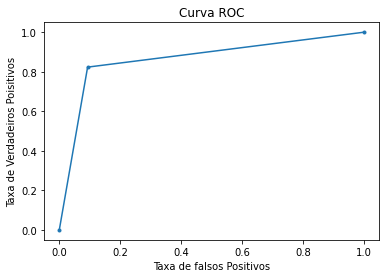

In [ ]:
#plotando curva roc 
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, classificacao)
plt.plot(fpr, tpr, marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Poisitivos')
plt.show()

**Área sob a curva (Area under the curve - AUC)**

In [ ]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,classificacao)
round(auc,3)

0.865

**Validação cruzada**

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score
#define modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.6       , 0.83333333, 1.        , 0.9       , 1.        ,
       0.76666667, 0.8       , 0.72413793, 0.68965517, 0.68965517])

In [ ]:
round(scores.mean(),3),round(scores.std(),3)

(0.8, 0.127)

**7. Comparando MLP com Árvore de Decisão e Random Forest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores_arvore = cross_val_score(arvore,X,y,cv=10)

floresta = RandomForestClassifier()

#calculando os scores
scores_floresta = cross_val_score(floresta,X,y,cv=10)

#criando rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores
scores_mlp = cross_val_score(mlp,X,y,cv=10)

print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_mlp.mean(),3),round(scores_mlp.std(),3))


Árvore de Decisão:  0.694 0.165
Random Forest:  0.8 0.127
MLP: 0.78 0.129


**Otimização de Parâmetros**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(100),(50,10),(100,50)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [1000,2000]
              }
              
]

mlp = RandomizedSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

mlp.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{

In [ ]:
print(mlp.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'hidden_layer_sizes': 100, 'activation': 'identity'}


In [ ]:
print(round(mlp.best_score_,3))

0.802


In [ ]:
from sklearn.model_selection import GridSearchCV

mlp = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

mlp.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [ ]:
print(mlp.best_params_)

{'activation': 'identity', 'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam'}


In [ ]:
print(mlp.best_score_)

0.815084745762712


In [ ]:
mlp.cv_results_

{'mean_fit_time': array([1.11287117e-02, 2.25831032e-02, 1.64756632e-01, 3.03421021e-03,
        1.88083649e-02, 1.87769794e-01, 7.63545036e-03, 3.96972656e-02,
        5.81562042e-02, 5.04541397e-03, 6.33029938e-02, 7.02898979e-02,
        5.75795174e-03, 5.74481964e-02, 6.78848267e-02, 2.04475403e-02,
        4.91146088e-02, 5.63921928e-02, 1.17413998e-02, 3.80977154e-02,
        5.14870167e-02, 1.96013927e-02, 3.58494282e-02, 2.92999744e-02,
        1.28683567e-02, 9.60287094e-02, 1.30283165e-01, 3.12252998e-02,
        8.36453915e-02, 7.60872364e-02, 1.81328058e-01, 3.79089785e-01,
        4.32899523e-01, 1.23570156e-01, 3.84984589e-01, 4.09085321e-01,
        1.08612766e+00, 6.04123402e-01, 4.16379690e-01, 1.79981327e+00,
        6.83397055e-01, 3.70172453e-01, 1.92776647e+00, 7.56416559e-01,
        4.05481720e-01, 3.00897059e+00, 6.84117985e-01, 3.98966455e-01,
        6.38227320e-01, 1.04378881e+00, 4.46367836e-01, 1.55018139e+00,
        1.28078899e+00, 5.21185970e-01, 3.67831

Análise e Interpretação

Para melhorar a precisão e acurácia dos dados, foi decido utilizar apenas 4 classes diferente das 11 utilizadas na atividade passada. As 4 classes escolhidas para realizar o treinamento da rede neural artificial foram: idade, o tempo desde o início dos acompanhamentos, ejeção fração e soro creatinina. Todas essas classes foram analisadas diretamente relacionadas com os eventos de morte em paciente do estudo. O intuito é investigar como esses fatores influenciam ou não os eventos de mortes por doenças cardiovasculares nos seres humanos.
 
Nossa acurácia e precisão saíram da faixa de 70% para 93% de acurácia e mais de 80% de precisão em nossos dados, sabemos que melhorias precisam ser aplicadas em nossa precisão para obtermos resultados mais confiáveis na investigação, o que será aplicado em atividades futuras.
 
Com o uso da redes neurais artificiais conseguimos obter a melhor pontuação na faixa de 81% nos testes.